In [5]:
import qiskit as q
%matplotlib inline

In [6]:
circuit =q.QuantumCircuit(2,2)

In [7]:
# 0 0
circuit.h(0)#superposition the first qbit
# ? 0
circuit.cx(0,1)#controlled not : not bit two if bit 1 is high
# ? ?(00 or 11)


In [8]:
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

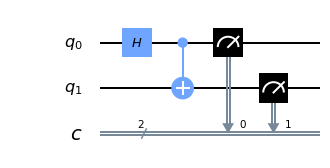

In [9]:
circuit.draw(output='mpl')

In [11]:
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider("ibm-q")
#to check the backend providers for queues
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count ="simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
            

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 4 queued and 5 qubits
ibmq_16_melbourne has 19 queued and 15 qubits
ibmq_vigo has 6 queued and 5 qubits
ibmq_ourense has 2 queued and 5 qubits
ibmq_london has 1 queued and 5 qubits
ibmq_burlington has 2 queued and 5 qubits
ibmq_essex has 2 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_rome has 1 queued and 5 qubits


In [13]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_london")
job = q.execute(circuit,backend=backend, shots=1000)
job_monitor(job)

Job Status: job has successfully run


In [14]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")


In [15]:
result=job.result()
counts = result.get_counts(circuit)

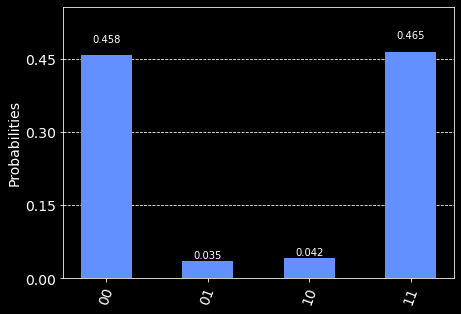

In [16]:
plot_histogram([counts])